# Forecast the CocaCola prices and Airlines Passengers data set.
# Prepare a document for each model explaining. 
# how many dummy variables you have created and RMSE value for each model.
# Finally which model you will use for Forecasting.


# -- COCA COLA DATA SET --

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

In [2]:
data = pd.read_excel("D:\\Data Science Assignments\\Forecasting\\CocaCola_Sales_Rawdata.xlsx")

In [3]:
data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [4]:
data1 = data.copy()

In [5]:
data1

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [6]:
data1.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [7]:
data1.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [8]:
data1.dtypes

Quarter     object
Sales      float64
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [10]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,42.0,2994.353308,977.930896,1547.818996,2159.714247,2782.376999,3609.25,5253.0


In [11]:
temp = data1.Quarter.str.replace(r'(Q\d)_(\d+)', r'19\2-\1')

In [12]:
data1['quater'] = pd.to_datetime(temp).dt.strftime('%b-%Y')

In [13]:
data1

,Quarter,Sales,quater
0,Q1_86,1734.827000,Jan-1986
1,Q2_86,2244.960999,Apr-1986
2,Q3_86,2533.804993,Jul-1986
3,Q4_86,2154.962997,Oct-1986
4,Q1_87,1547.818996,Jan-1987
5,Q2_87,2104.411995,Apr-1987
6,Q3_87,2014.362999,Jul-1987
7,Q4_87,1991.746998,Oct-1987
8,Q1_88,1869.049999,Jan-1988
9,Q2_88,2313.631996,Apr-1988


In [14]:
data1 = data1.drop(['Quarter'], axis=1)

In [15]:
data1.reset_index(inplace=True)

In [16]:
data1['quater'] = pd.to_datetime(data1['quater'])

In [17]:
data1 = data1.set_index('quater')

In [18]:
data1

,index,Sales
quater,,
1986-01-01,0,1734.827000
1986-04-01,1,2244.960999
1986-07-01,2,2533.804993
1986-10-01,3,2154.962997
1987-01-01,4,1547.818996
1987-04-01,5,2104.411995
1987-07-01,6,2014.362999
1987-10-01,7,1991.746998
1988-01-01,8,1869.049999


<function matplotlib.pyplot.show(close=None, block=None)>

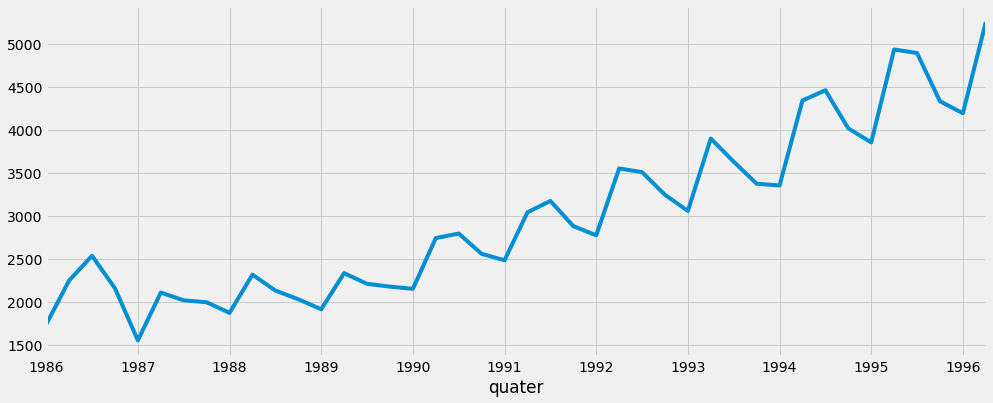

In [19]:
data1['Sales'].plot(figsize=(15,6))
plt.show

In [20]:
len(data1['Sales'])

42

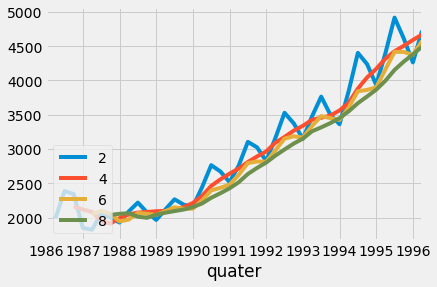

In [21]:
for i in range(2,10,2):
    data1["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

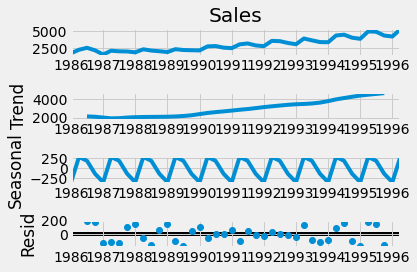

In [22]:
ts_add = seasonal_decompose(data1.Sales,model="additive")
fig = ts_add.plot()
plt.show()

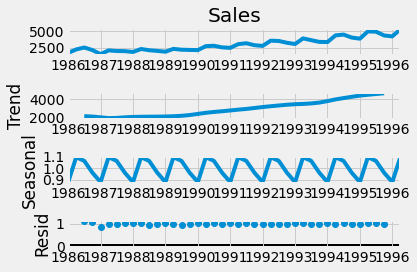

In [23]:
ts_mul = seasonal_decompose(data1.Sales,model="multiplicative")
fig = ts_mul.plot()
plt.show()

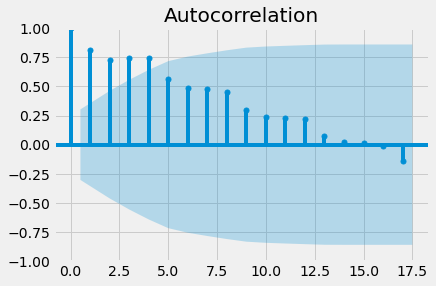

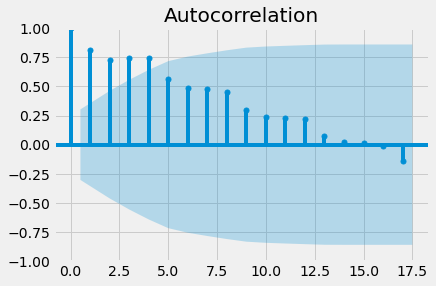

In [24]:
tsa_plots.plot_acf(data1.Sales)

- Building Time series forecasting with ARIMA

In [25]:
import statsmodels.api as sm

X = data1['Sales'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
model = sm.tsa.arima.ARIMA(train, order=(5,1,0))
model_fit = model.fit()

In [26]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   27
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -174.082
Date:                Thu, 17 Nov 2022   AIC                            360.163
Time:                        13:26:28   BIC                            367.712
Sample:                             0   HQIC                           362.337
                                 - 27                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1024      0.306     -0.335      0.738      -0.702       0.497
ar.L2         -0.2140      0.160     -1.338      0.181      -0.527       0.099
ar.L3         -0.0892      0.191     -0.468      0.6

- This summarizes the coefficient values used as well as the skill of the fit on the on the in-sample observations

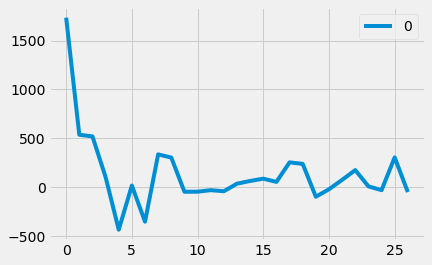

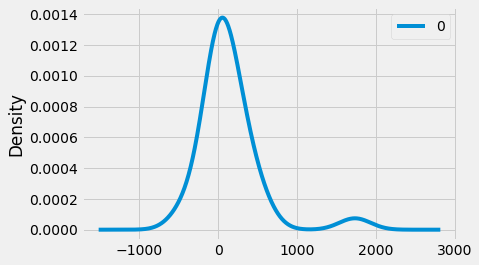

                 0
count    27.000000
mean    137.791853
std     385.970462
min    -433.659591
25%     -34.938862
50%      55.067401
75%     247.080158
max    1734.827000


In [27]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

- Rolling Forecast ARIMA Model

In [28]:
history = [x for x in train]

In [29]:
predictions = list()

In [30]:
for t in range(len(test)):
    model = sm.tsa.arima.ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=3130.132572, expected=3243.859993
predicted=3167.315970, expected=3056.000000
predicted=3717.472605, expected=3899.000000
predicted=3775.837498, expected=3629.000000
predicted=3332.747779, expected=3373.000000
predicted=3258.568922, expected=3352.000000
predicted=4081.006046, expected=4342.000000
predicted=3955.784539, expected=4461.000000
predicted=4146.277689, expected=4017.000000
predicted=3958.437470, expected=3854.000000
predicted=4701.652907, expected=4936.000000
predicted=4990.059117, expected=4895.000000
predicted=4390.352760, expected=4333.000000
predicted=4190.870996, expected=4194.000000
predicted=5176.989107, expected=5253.000000


In [31]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 34280.015


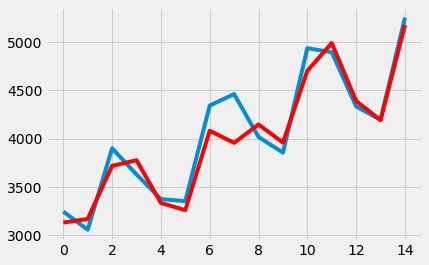

In [32]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

- Comparing Multiple Models

In [33]:
data2 = pd.get_dummies(data, columns = ['Quarter'])

In [34]:
data2.columns = ['Sales','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4']

In [35]:
data2

,Sales,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,...,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4
0,1734.827000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2244.960999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2533.804993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2154.962997,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1547.818996,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2104.411995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2014.362999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1991.746998,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,1869.049999,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2313.631996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
t= np.arange(1,43)

In [37]:
data2['t'] = t

In [38]:
data2['t_sq'] = data2['t']*data2['t']

In [39]:
log_Sales=np.log(data2['Sales'])

In [40]:
data2['log_Sales']=log_Sales

In [41]:
data2

,Sales,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,...,Q4,Q4,Q4,Q4,Q4,Q4,Q4,t,t_sq,log_Sales
0,1734.827000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,7.458663
1,2244.960999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,4,7.716443
2,2533.804993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,9,7.837477
3,2154.962997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,16,7.675529
4,1547.818996,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,25,7.344602
5,2104.411995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6,36,7.651791
6,2014.362999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,49,7.608058
7,1991.746998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8,64,7.596767
8,1869.049999,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9,81,7.533186
9,2313.631996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,10,100,7.746574


In [42]:
train1, test1 = np.split(data2, [int(.67 *len(data2))])

In [43]:
linear= smf.ols('Sales ~ t',data=train1).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test1['t'])))
rmselin=np.sqrt((np.mean(np.array(test1['Sales'])-np.array(predlin))**2))
rmselin

580.1224130918637

In [44]:
quad=smf.ols('Sales~t+t_sq',data=train1).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test1[['t','t_sq']])))
rmsequad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predquad))**2))
rmsequad

783.7297975037425

In [45]:
expo=smf.ols('log_Sales~t',data=train1).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test1['t'])))
rmseexpo=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predexp)))**2))
rmseexpo

588.1405104900183

In [46]:
additive= smf.ols('Sales~ Q1+Q2+Q3+Q4',data=train1).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(test1[['Q1','Q2','Q3','Q4']])))
rmseadd=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predadd))**2))
rmseadd

1869.7188209186954

In [47]:
addlinear= smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=train1).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(test1[['t','Q1','Q2','Q3','Q4']])))
rmseaddlinear=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predaddlinear))**2))
rmseaddlinear

596.1526282372528

In [48]:
addquad=smf.ols('Sales~t+t_sq+Q1+Q2+Q3+Q4',data=train1).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(test1[['t','t_sq','Q1','Q2','Q3','Q4']])))
rmseaddquad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predaddquad))**2))
rmseaddquad

412.114443605461

In [49]:
mulsea=smf.ols('log_Sales~Q1+Q2+Q3+Q4',data=train1).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(test1[['Q1','Q2','Q3','Q4']])))
rmsemul= np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predmul)))**2))
rmsemul

2374.919440795444

In [50]:
mullin= smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=train1).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(test1[['t','Q1','Q2','Q3','Q4']])))
rmsemulin=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predmullin)))**2))
rmsemulin

5359.687911931751

In [51]:
mul_quad= smf.ols('log_Sales~t+t_sq+Q1+Q2+Q3+Q4',data=train1).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test1[['t','t_sq','Q1','Q2','Q3','Q4']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

3630.5619467352553

In [52]:
output = {'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),
          'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}

In [53]:
rmse=pd.DataFrame(output)

In [54]:
print(rmse)

           Model       Values
0  rmse_mul_quad  3630.561947
1        rmseadd  1869.718821
2  rmseaddlinear   596.152628
3    rmseaddquad   412.114444
4       rmseexpo   588.140510
5        rmselin   580.122413
6        rmsemul  2374.919441
7      rmsemulin  5359.687912
8       rmsequad   783.729798


# -- AIRLINES DATASET --

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

In [56]:
airline = pd.read_excel("D:\\Data Science Assignments\\Forecasting\\Airlines+Data.xlsx")

In [57]:
airline

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [58]:
airline['Month'].unique()

array(['1995-01-01T00:00:00.000000000', '1995-02-01T00:00:00.000000000',
       '1995-03-01T00:00:00.000000000', '1995-04-01T00:00:00.000000000',
       '1995-05-01T00:00:00.000000000', '1995-06-01T00:00:00.000000000',
       '1995-07-01T00:00:00.000000000', '1995-08-01T00:00:00.000000000',
       '1995-09-01T00:00:00.000000000', '1995-10-01T00:00:00.000000000',
       '1995-11-01T00:00:00.000000000', '1995-12-01T00:00:00.000000000',
       '1996-01-01T00:00:00.000000000', '1996-02-01T00:00:00.000000000',
       '1996-03-01T00:00:00.000000000', '1996-04-01T00:00:00.000000000',
       '1996-05-01T00:00:00.000000000', '1996-06-01T00:00:00.000000000',
       '1996-07-01T00:00:00.000000000', '1996-08-01T00:00:00.000000000',
       '1996-09-01T00:00:00.000000000', '1996-10-01T00:00:00.000000000',
       '1996-11-01T00:00:00.000000000', '1996-12-01T00:00:00.000000000',
       '1997-01-01T00:00:00.000000000', '1997-02-01T00:00:00.000000000',
       '1997-03-01T00:00:00.000000000', '1997-04-01

In [59]:
airline['Date']= pd.to_datetime(airline.Month,format='%b-%y')
airline['Months']= airline.Date.dt.strftime('%b')
airline['Year'] = airline.Date.dt.strftime('%Y')

In [60]:
airline

,Month,Passengers,Date,Months,Year
0,1995-01-01,112,1995-01-01,Jan,1995
1,1995-02-01,118,1995-02-01,Feb,1995
2,1995-03-01,132,1995-03-01,Mar,1995
3,1995-04-01,129,1995-04-01,Apr,1995
4,1995-05-01,121,1995-05-01,May,1995
...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,2002
92,2002-09-01,355,2002-09-01,Sep,2002
93,2002-10-01,306,2002-10-01,Oct,2002
94,2002-11-01,271,2002-11-01,Nov,2002


In [61]:
airline.isnull().sum()

Month         0
Passengers    0
Date          0
Months        0
Year          0
dtype: int64

In [62]:
airline.dtypes

Month         datetime64[ns]
Passengers             int64
Date          datetime64[ns]
Months                object
Year                  object
dtype: object

In [63]:
airline.describe().T

,count,mean,std,min,25%,50%,75%,max
Passengers,96.0,213.708333,71.918216,104.0,156.0,200.0,264.75,413.0


In [64]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
 2   Date        96 non-null     datetime64[ns]
 3   Months      96 non-null     object        
 4   Year        96 non-null     object        
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 3.9+ KB


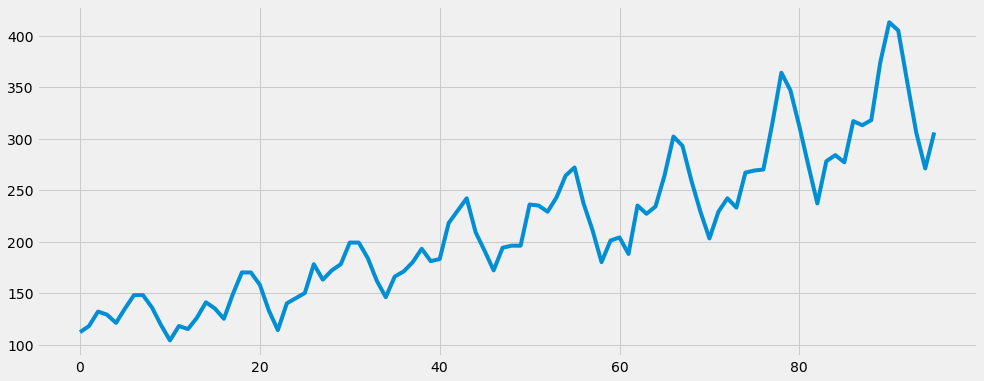

In [65]:
airline['Passengers'].plot(figsize=(15, 6))
plt.show()

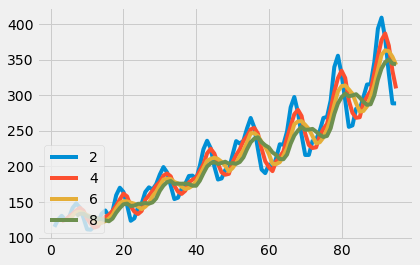

In [66]:
for i in range(2,10,2):
    airline['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

<AxesSubplot:xlabel='Month', ylabel='Year'>

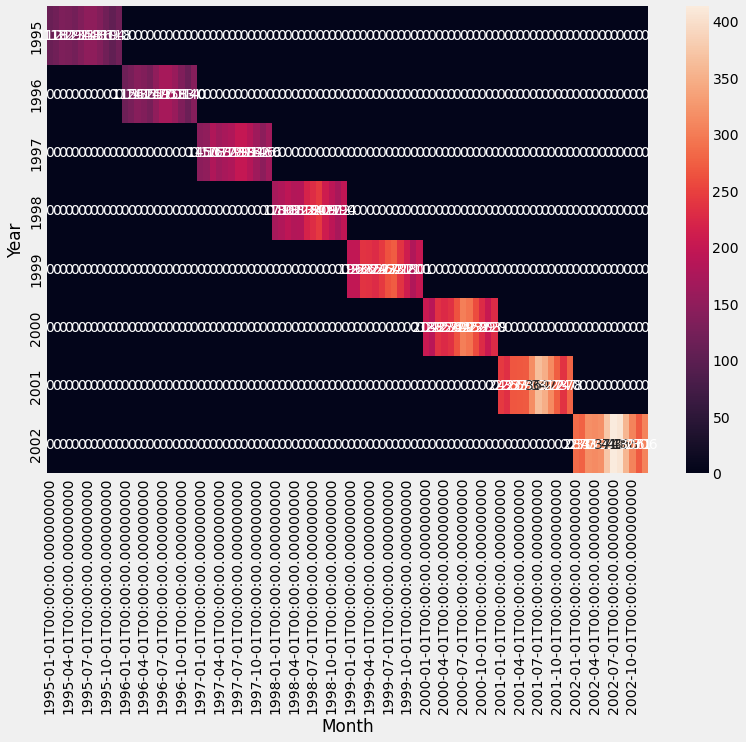

In [67]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=airline,values='Passengers',index='Year',columns='Month',aggfunc='mean',fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt='g')

<AxesSubplot:xlabel='Year', ylabel='Passengers'>

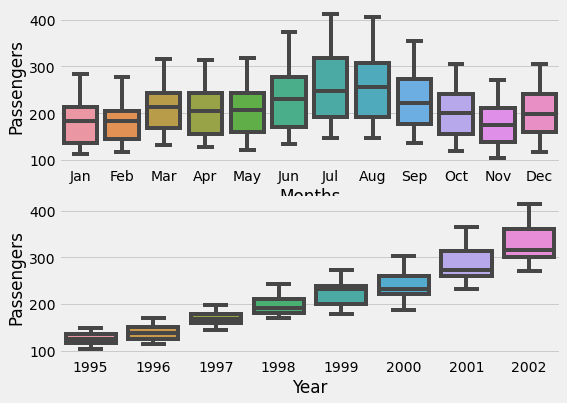

In [68]:
# Boxplot 
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x='Months',y='Passengers',data=airline)
plt.subplot(212)
sns.boxplot(x='Year',y='Passengers', data=airline)

- Building Time series forecasting with ARIMA

In [69]:
#Preparing dummies
Month_Dummies= pd.DataFrame(pd.get_dummies(airline['Months']))
airline1 = pd.concat([airline,Month_Dummies],axis =1)

In [70]:
airline1["t"] = np.arange(1,97)
airline1["t_squared"] = airline1["t"] * airline1["t"]
airline1["Log_Passengers"] = np.log(airline1["Passengers"])

<AxesSubplot:xlabel='Year', ylabel='Passengers'>

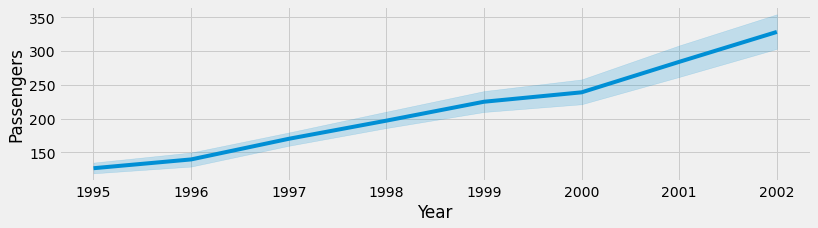

In [71]:
plt.figure(figsize=(12,3))
sns.lineplot(x='Year', y='Passengers', data=airline)

In [72]:
#Splitting data
Train = airline1.head(80)
Test = airline1.tail(16)

In [73]:
linear_model = smf.ols('Passengers~t', data=Train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])- np.array(pred_linear))**2))
rmse_linear

47.542624067726756

In [74]:
#Exponential Model
Exp = smf.ols('Log_Passengers~t', data = Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])- np.array(np.exp(pred_Exp)))**2))
rmse_Exp

43.79373939334316

In [75]:
#Quadratic Model
Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[['t','t_squared']]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

43.65440369584208

In [76]:
#Additive seasonality
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])- np.array(pred_add_sea))**2))
rmse_add_sea

129.26647641443319

In [77]:
#Additive Seasonality quadratic
add_sea_Quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

23.910983570106776

In [78]:
#Multiplicative Seasonality
Mul_sea = smf.ols('Log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

135.32648414621136

In [79]:
#Multiplicative Additive Seasonality
Mul_Add_sea = smf.ols('Log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

9.46900023030563

In [80]:
#Tabulating the rmse values
data= {'Model':pd.Series(['rmse_linear','rmse_Exp','rmse_Quad','rmse_add_sea','rmse_add_sea_quad','rmse_Mult_sea','rmse_Mult_add_sea']),'RMSE_Values':pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse = pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,Model,RMSE_Values
6,rmse_Mult_add_sea,9.469000
4,rmse_add_sea_quad,23.910984
2,rmse_Quad,43.654404
1,rmse_Exp,43.793739
0,rmse_linear,47.542624
3,rmse_add_sea,129.266476
5,rmse_Mult_sea,135.326484


In [81]:
# Forecasting using Multiplicative Additive Seasonality Model
# Forecasting for next 12 months
data = [['2003-01-01','Jan'],['2003-02-01','Feb'],['2003-03-01','Mar'],['2003-04-01','Apr'],['2003-05-01','May'],['2003-06-01','Jun'],['2003-07-01','Jul'],['2003-08-01','Aug'],['2003-09-01','Sep'],['2003-10-01','Oct'],['2003-11-01','Nov'],['2003-12-01','Dec']]
# Print(data)
forecast = pd.DataFrame(data,columns = ['Date','Months'])
forecast

,Date,Months
0,2003-01-01,Jan
1,2003-02-01,Feb
2,2003-03-01,Mar
3,2003-04-01,Apr
4,2003-05-01,May
5,2003-06-01,Jun
6,2003-07-01,Jul
7,2003-08-01,Aug
8,2003-09-01,Sep
9,2003-10-01,Oct


In [82]:
# Create dummies and T and T-Squared columns

dummies = pd.DataFrame(pd.get_dummies(forecast['Months']))
forecast1 = pd.concat([forecast, dummies], axis =1)
print('After dummy\n',forecast1.head())

forecast1['t'] = np.arange(1,13)
forecast1['t_squared'] = forecast1['t'] * forecast1['t']
print('\nAfter T and T-Squared\n', forecast1.head())

After dummy
          Date Months  Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  \
0  2003-01-01    Jan    0    0    0    0    1    0    0    0    0    0    0   
1  2003-02-01    Feb    0    0    0    1    0    0    0    0    0    0    0   
2  2003-03-01    Mar    0    0    0    0    0    0    0    1    0    0    0   
3  2003-04-01    Apr    1    0    0    0    0    0    0    0    0    0    0   
4  2003-05-01    May    0    0    0    0    0    0    0    0    1    0    0   

   Sep  
0    0  
1    0  
2    0  
3    0  
4    0  

After T and T-Squared
          Date Months  Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  \
0  2003-01-01    Jan    0    0    0    0    1    0    0    0    0    0    0   
1  2003-02-01    Feb    0    0    0    1    0    0    0    0    0    0    0   
2  2003-03-01    Mar    0    0    0    0    0    0    0    1    0    0    0   
3  2003-04-01    Apr    1    0    0    0    0    0    0    0    0    0    0   
4  2003-05-01    May    0    0    0    

In [83]:
# Forecasting using Multiplicative Additive Seasonality Model

model_full = smf.ols('Log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data =airline1).fit()
pred_new  = pd.Series(model_full.predict(forecast1))
pred_new

forecast1["Forecasted_log"] = pd.Series(pred_new)
forecast1['Forecasted_Passengers'] = np.exp(forecast1['Forecasted_log'])

In [84]:
# Final Prediction 

Final_predict = forecast1.loc[:, ['Months','Forecasted_Passengers']]
Final_predict

,Months,Forecasted_Passengers
0,Jan,109.176148
1,Feb,110.331245
2,Mar,127.315234
3,Apr,123.200587
4,May,122.399578
5,Jun,138.536397
6,Jul,154.066959
7,Aug,153.741209
8,Sep,137.693733
9,Oct,120.894736
